In [9]:
#Setup for later functions in K-Means
import random as rand
import matplotlib.pyplot as plt
from math import sqrt
# rand.seed(8127324981273) # uncomment to get fixed results 

class KMeans():


    def __init__(self):
        self.point_count = 12 # Edit here to get more points to be assigned
        self.centroid_count = 4 # Edit here to get more centroids
        self.dimensions = 2 # Edit here to change dimensions of points
        self.iterations = 0
        self.get_points()
        self.get_centroids()
        self.previous_split = {}
        self.point_to_group = {}
        self.groups = {}
        for i in range(0,self.centroid_count):
            self.groups[i] = []

    def get_point(self):
        return [rand.randint(-10,10) for i in range(0,self.dimensions)]

    def get_points(self):
        self.points = []
        for point in range(0,self.point_count):
            self.points.append(self.get_point())
        return self.points

    def get_centroids(self):
        self.centroids = []
        for point in range(0,self.centroid_count):
            self.centroids.append(self.get_point())
        return self.centroids

    def do_k_means(self):
        self.iterations = 0
        while True:
            # Cleaning groups
            for i in range(0,len(self.centroids)):
                self.groups[i] = []
            # Increasing iterations            
            self.iterations += 1
            # print(f"centroids for {self.iterations} : {self.centroids}")
            # Get lowest distance for each point
            for point_index,point in enumerate(self.points):
                lowest = 999
                group = 0
                # Get distance to each centroid                
                for group_number,centroid in enumerate(self.centroids):
                    distance = 0 

                    for cooridnate,element in enumerate(point):
                        distance += (element-centroid[cooridnate])**2 
                    # distance = sqrt(distance) # Comparing squares is the same as comparing values for positive values
                    # If distance is the lowest so far, assing point to this centroid          
                    if distance < lowest:
                        lowest = distance
                        group = group_number
                #Add point to chosen group
                self.point_to_group[point_index] = group
                self.groups[group].append(point)
            #Calculate new centroids from mean of group
            centr = []
            for group in sorted(self.groups):
                new_centr = [0] * self.dimensions
                for point in self.groups[group]:
                    for cooridnate,element in enumerate(point):
                        new_centr[cooridnate] += element
                for coordinate,element in enumerate(new_centr):
                    try:
                        new_centr[coordinate] = element/len(self.groups[group])
                    except ZeroDivisionError:
                        print("Removing empty centroid")
                        new_centr = -1
                        del self.groups[group]
                        break
                if new_centr != -1:
                    centr.append(new_centr)
            self.centroids = centr
            # If the split is the same as last time, break calculations
            if self.groups == self.previous_split:
                break
            else:
                self.previous_split = self.groups

Points to be assigned : [[-6, -6], [-10, 9], [-9, -4], [-7, 2], [5, 2], [10, -2], [6, -3], [-9, -3], [9, -4], [9, 10], [-10, 9], [-8, -9]], initial centroid values : [[-5, 3], [9, 7], [-4, 9], [8, 3]]


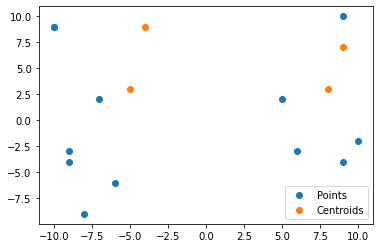

In [25]:
#K-Means - initial conditions
km = KMeans()

if km.dimensions == 2:
    x, y = zip(*km.points)
    x_c, y_c = zip(*km.centroids)

    plt.scatter(x, y, label=f"Points")
    plt.scatter(x_c, y_c, label=f"Centroids")
    plt.legend()

print(f"Points to be assigned : {km.points}, initial centroid values : {km.centroids}")

In [23]:
#Uncomment and run to get data from official exercise
# official_points = [[1,1,1, 0],[0,2,0,0],[2,3,-1,3],[1,2, 0,0]]
# centroids = [[1,1,1, 0],[1,2, 0,0]]
# km.points = official_points
# km.centroids = centroids
# km.dimensions = 4
# km.previous_split = {}


{0: [[-8, -10], [0, -8], [0, -10], [-3, -10], [-1, -9], [-5, -8]],
 3: [[5, -1], [1, 3], [4, 3], [1, -2], [-1, 2], [-1, -3]],
 1: [[5, -1], [1, 3], [4, 3], [1, -2], [-1, 2], [-1, -3]]}

Removing empty centroid
Stopping after 1 iterations with centroids in [[-2.8333333333333335, -9.166666666666666], [1.5, 0.3333333333333333], [1.5, 0.3333333333333333]]


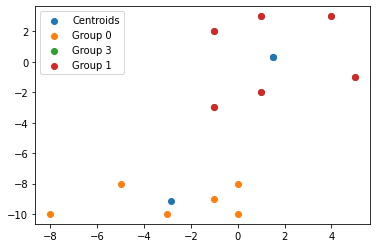

In [20]:
#K-Means - solution
km.do_k_means()
if km.dimensions == 2:
    x_c, y_c = zip(*km.centroids)
    plt.scatter(x_c, y_c, label=f"Centroids")
    for group in km.groups:
        if km.groups[group]:
            x, y = zip(*km.groups[group])
            plt.scatter(x, y, label=f"Group {group}")
    plt.legend()
    
print(f"Stopping after {km.iterations} iterations with centroids in {km.centroids}")

In [13]:
# Knn - Run this to get point to classify and groups using groups from the example above
point_to_classify = km.get_point()
print(f"Point to be clasified : {point_to_classify}, groups: {km.groups}")

Point to be clasified : [-3, -6], groups: {0: [[-8, -10], [0, -8], [0, -10], [-3, -10], [-1, -9], [-5, -8]], 3: [[5, -1], [1, 3], [4, 3], [1, -2], [-1, 2], [-1, -3]], 1: [[5, -1], [1, 3], [4, 3], [1, -2], [-1, 2], [-1, -3]]}


4 closest points belong to groups : [1, 0, 0]


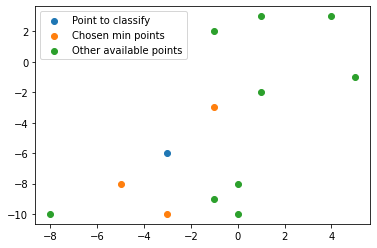

In [17]:
#Knn calculations

from collections import Counter 

def calculate_distance(a,b):
    distance = 0
    for cooridnate,element in enumerate(a):
        distance += (element-b[cooridnate])**2 
    return distance

def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0] 


if km.dimensions == 2:
        plt.scatter(*point_to_classify, label="Point to classify")
knn_k = 4 # Value of k ( Count of closest neighbours ) for knn
min_distances = {}
for index,point in enumerate(km.points):
    distance = calculate_distance(point,point_to_classify)
    if len(min_distances) < knn_k:
        min_distances[distance] = index
    elif distance < max(min_distances):
        del min_distances[max(min_distances)]
        min_distances[distance] = index
groups =[ km.point_to_group[v] for v in min_distances.values()]
print(f"{knn_k} closest points belong to groups : {groups}")

if km.dimensions == 2:
    min_points = [ km.points[v] for v in min_distances.values() ]
    other_points = [ p for p in  km.points if p not in min_points ]
    x,y = zip(*min_points)
    plt.scatter(x,y, label="Chosen min points")
    x,y = zip(*other_points)
    plt.scatter(x,y, label="Other available points")
    plt.legend()